In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

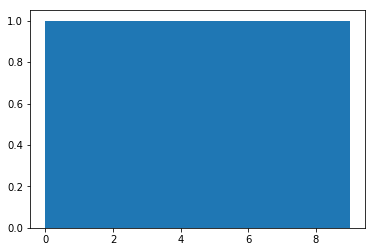

In [2]:
plt.hist(np.arange(10))
plt.show()

In [3]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils_zee import *

Welcome to JupyROOT 6.20/02


In [4]:
def get_cp_err(num, den, num_err=None, den_err=None):

        # Clopper-Pearson errors
        # tail = (1 - cl) / 2
        # 2sigma (95% CL): tail = (1 - 0.95) / 2 = 0.025
        # 1sigma (68% CL): tail = (1 - 0.68) / 2 = 0.16
        tail = 0.16
        
        if num == 0. or den == 0: return 1.
        
        if num_err is None:
            num_err = np.sqrt(num)
        if den_err is None:
            den_err = np.sqrt(den)

        n_num = pow(num/num_err, 2.)
        n_den = pow(den/den_err, 2.)

        # nom
        n_rat = n_num / n_den

        # lower limit
        q_low = ROOT.Math.fdistribution_quantile_c(1-tail, n_num*2, (n_den+1)*2)
        r_low = q_low * n_num / (n_den + 1)

        # upper limit
        q_high = ROOT.Math.fdistribution_quantile_c(tail, (n_num+1)*2, n_den*2)
        r_high = q_high * (n_num + 1) / n_den

        # lower, upper errors
        err_lo, err_hi = n_rat - r_low, r_high - n_rat

        #return err_lo, err_hi
        #err_ = np.sqrt(np.mean(np.array([err_lo, err_hi])**2))
        err_ = err_lo if num/den > 1. else err_hi
        return err_

In [5]:
samples = ['Run2017', 'DYToEE']
#samples = ['Run2017']
ma, wgt = {}, {}

for s in samples:
    #in_files = glob.glob('Templates/aod/%s*_ma1.txt'%s)
    in_files = glob.glob('Templates/%s*_ma1.txt'%s)
    print(in_files)
    
    ma[s], wgt[s] = [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for l in f:
            ma_, wgt_ = l.replace('\n','').split(':')
            ma[s].append(float(ma_))
            wgt[s].append(float(wgt_))

    ma[s] = np.array(ma[s])
    wgt[s] = np.array(wgt[s])
    wgt[s] = wgt[s][ma[s] > -0.2]
    ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == wgt[s])
    print(len(ma[s]), len(wgt[s]))
    print(ma[s][:5])
    print(wgt[s][:5])

['Templates/Run2017B_ma1.txt', 'Templates/Run2017D_ma1.txt', 'Templates/Run2017E_ma1.txt', 'Templates/Run2017C_ma1.txt', 'Templates/Run2017F_ma1.txt']
13503969 13503969
[0.069651 0.039235 0.082894 0.139563 0.51743 ]
[1. 1. 1. 1. 1.]
['Templates/DYToEE_ma1.txt']
2084409 2084409
[-0.104737 -0.005871  0.348417  0.206033  0.112075]
[6.683568 6.353453 5.170537 5.582994 6.389646]


[-0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.     0.025
  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275
  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5    0.525
  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725  0.75   0.775
  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975  1.     1.025
  1.05   1.075  1.1    1.125  1.15   1.175  1.2    1.6  ]
[-0.1875 -0.1625 -0.1375 -0.1125 -0.0875 -0.0625 -0.0375 -0.0125  0.0125
  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875  0.2125  0.2375
  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125  0.4375  0.4625
  0.4875  0.5125  0.5375  0.5625  0.5875  0.6125  0.6375  0.6625  0.6875
  0.7125  0.7375  0.7625  0.7875  0.8125  0.8375  0.8625  0.8875  0.9125
  0.9375  0.9625  0.9875  1.0125  1.0375  1.0625  1.0875  1.1125  1.1375
  1.1625  1.1875  1.2125]
mc, mean: 0.160984, stdev:0.246927
data, mean: 0.166722, stdev:0.258906
data corr, mean: 0.167887, stdev:0.251397


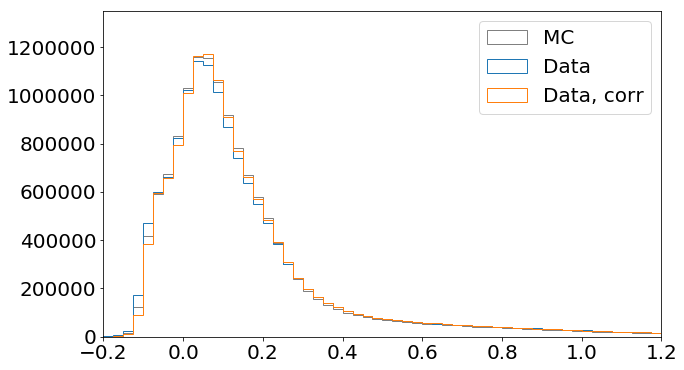

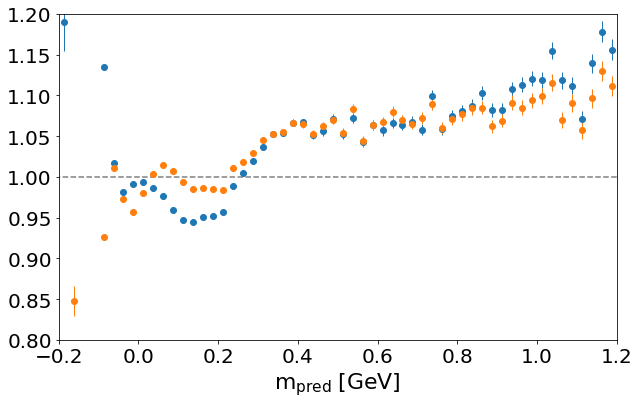

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 20})

#bins_ = 120
dM = 25
#bins_ = np.concatenate([[-0.2], np.arange(0,1200+dM,dM)/1000., [1.6]])
bins_ = np.concatenate([np.arange(-200,0,dM)/1000., np.arange(0,1200+dM,dM)/1000., [1.6]])
bin_ctrs = bins_[:-1].copy()
#bin_ctrs[0] = bin_ctrs[0]+0.1
bin_ctrs[0] = bin_ctrs[0]+(dM/2000.)
bin_ctrs[1:] = bin_ctrs[1:]+(dM/2000.)
#xlims = [-0., 0.2]
xlims = [-0.2, 1.2]
print(bins_)
print(bin_ctrs)

def smear(ma, scale, offset, sigma, sigma_frac=None):
    '''if sigma_frac is None:
        gauss = np.random.normal(mu, sigma, size=len(ma))
        ma_smeared = [m*g for m, g in zip(ma, gauss)]
    else:'''
    if sigma_frac is None:
        #ma_smeared = [np.random.normal((scale*m)+offset, sigma) for m in ma]
        ma_smeared = scale*np.array(ma) + offset if sigma == 0. else scale*np.array([np.random.normal(m, sigma) for m in ma])+offset
    else:
        ma_smeared = [np.random.normal((scale*m)+offset, sigma_frac*m) for m in ma]
    return ma_smeared
    
def plot_datavmc(ma, wgt, scale, offset, sigma=0., make_plot=True):

    mcwgts = wgt['DYToEE']*len(ma['Run2017'][ma['Run2017']>-0.2])/sum(wgt['DYToEE'][wgt['DYToEE']>-0.2])
    #ma_shift = scale*ma['Run2017'] + offset
    ma_shift = smear(ma['Run2017'], scale, offset, sigma, sigma_frac=None)
    
    if make_plot:
        fig = plt.figure()
    hmc, edges, _ = plt.hist(ma['DYToEE'], bins=bins_, histtype='step', label='MC', weights=mcwgts, color='grey')
    mean = np.mean(ma['DYToEE'])
    stdev = np.std(np.array(ma['DYToEE'])-mean)
    print('mc, mean: %f, stdev:%f'%(mean, stdev))
    hdata, edges, _ = plt.hist(ma['Run2017'], bins=bins_, histtype='step', label='Data', color='C0')
    mean = np.mean(ma['Run2017'])
    stdev = np.std(np.array(ma['Run2017'])-mean)
    print('data, mean: %f, stdev:%f'%(mean, stdev))
    hdata2, edges, _ = plt.hist(ma_shift, bins=bins_, histtype='step', label='Data, corr', color='C1')
    mean = np.mean(ma_shift)
    stdev = np.std(np.array(ma_shift)-mean)
    print('data corr, mean: %f, stdev:%f'%(mean, stdev))
    if not make_plot:
        plt.close()
    
    if make_plot:
        plt.xlim(xlims)
        plt.ylim(0., np.sort(hdata)[-2]*1.2)
        #plt.xlabel(r'$\mathrm{m_{pred}}$', size=22)
        plt.legend(loc='upper right')
        plt.show()

        #'''
        fig = plt.figure()
        plt.plot(np.concatenate([[-0.4],bin_ctrs]), np.ones(len(bin_ctrs)+1), color='grey', linestyle='--')
        plt.errorbar(bin_ctrs, hdata/hmc, [get_cp_err(d,mc) for d,mc in zip(hdata, hmc)], marker='o', elinewidth=1., drawstyle='steps-mid', linewidth=0.)
        plt.errorbar(bin_ctrs, hdata2/hmc, [get_cp_err(d,mc) for d,mc in zip(hdata2, hmc)], marker='o', elinewidth=1., drawstyle='steps-mid', linewidth=0.)
        plt.ylim(1.-.2, 1.+.2)
        plt.xlim(xlims)
        plt.xlabel(r'$\mathrm{m_{pred}\;[GeV]}$', size=22)
        plt.show()
        #'''

    return edges, hmc, hdata, hdata2

scale=0.971#0.971
offset=6.e-3
sigma=1.e-2
edges, hmc, hdata, hdata2 = plot_datavmc(ma, wgt, scale, offset)#, sigma)

12943604.8259
687.753967285
13357852.0
800.0


Warning in <TROOT::Append>: Replacing existing TH1: DYToEE (Potential memory leak).


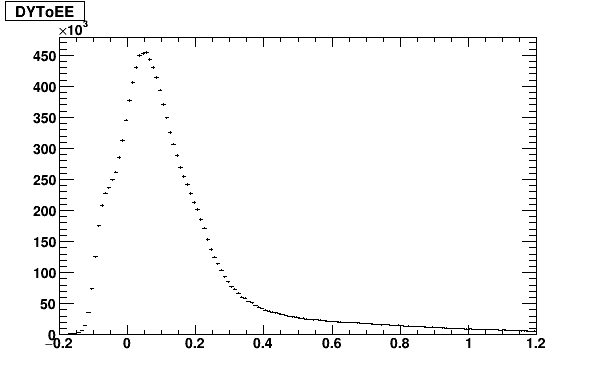

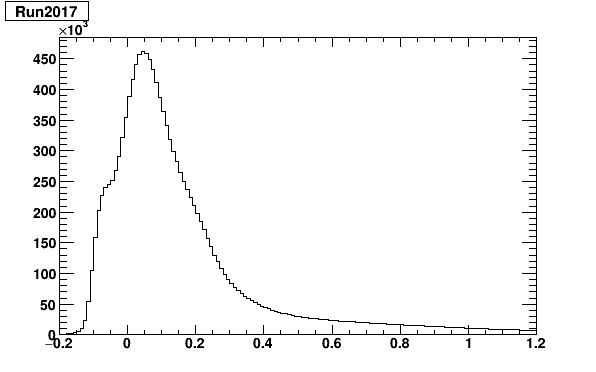

In [59]:
h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

k = 'DYToEE'
kmc = k
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 400)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    #m = (1./0.97)*(m - 0.006)
    #m = 1.036*m - 0.005
    #m = 0.946*m
    #m = 1.01*np.random.normal(m, 0.013)
    h[k].Fill(m, wgt['DYToEE'][i])
    #h[k].Fill(m)
h[k].Draw()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = 'Run2017'
kdata = k
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 400)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
h[k].Draw()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [40]:
#'''
#print(ma_bins)
#scale = 0.97
#offset = 0.006
scale = 1.024
offset = 0.
smear = 0.001
#mcwgts = wgt['DYToEE']*len(ma['Run2017'][ma['Run2017']>-0.2])/sum(wgt['DYToEE'][wgt['DYToEE']>-0.2])
#datawgts = np.ones(len(ma['Run2017']))*sum(wgt['DYToEE'][wgt['DYToEE']>-0.2])/len(ma['Run2017'][ma['Run2017']>-0.2])
#print(len(mcwgts))
#print(len(datawgts))
#ma_shift = smear(ma['Run2017'], 0.97, 0.006, sigma, sigma_frac=None)
#ma_shift = scale*np.array(ma['Run2017']) + offset
#ma_shift = scale*np.array(ma['DYToEE']) + offset
ma_shift = scale*np.array([np.random.normal(m, smear) for m in ma['DYToEE']])
#ma_shift = np.array(ma['Run2017'])
#print(len(ma_shift))
#hdata_shift, edges, _ = plt.hist(ma_shift, bins=ma_bins, histtype='step', label='MC', weights=datawgts, color='grey')
hdata_shift, _ = np.histogram(ma_shift, bins=ma_bins, weights=wgt['DYToEE'])
hdata_shift = np.float64(hdata_shift)
#hdata_shift *= (h['DYToEE'].Integral()/hdata_shift.sum())
hdata_shift *= (h['Run2017'].Integral()/hdata_shift.sum())
#plt.show()

im = h['Run2017'].GetXaxis().FindBin(-0.2)
print(im)
print(hdata_shift.sum())
print(hdata_shift[im-1])
print(hdata_shift)
print(len(hdata_shift))
#'''

1
13357852.0
773.2291157872827
[   773.22911579   1064.08460222   1307.29047031   2108.41934692
   2622.39030658   4786.8366764    8563.90754607  19665.17429042
  44887.50822774  86733.76931524 139017.44483942 184483.23196876
 213827.7491478  232121.30368911 240593.16476427 253064.42252304
 265616.96684109 290431.17491123 316754.60998727 349701.82317492
 379701.04339451 409407.13606723 432949.0469306  452020.96298151
 457276.80124476 458885.07170565 449591.13682217 434576.7411851
 421202.55693417 402434.43477945 380224.60795993 357982.19070298
 336763.05266877 315669.35161386 297585.61705325 278958.6267731
 263019.64440999 248833.93012238 237128.61810556 219948.69453486
 209006.40642283 196273.90422342 180900.69168512 164471.45466238
 148256.81165112 133392.64061085 120837.89303442 112191.83158432
 101143.77310997  91339.00610991  84361.81413706  76656.49764653
  72591.3001059   65827.286329    61225.75000327  58338.66442192
  53332.77384255  51506.33848993  47562.45221649  45042.36997

In [47]:
def get_KL(data, mc):
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    kl = data*np.log(data/mc)
    return kl.sum()

def get_KS(data, mc):
    data = np.float32(data)/data.sum()
    mc = np.float32(mc)/mc.sum()
    data = np.cumsum(data)
    mc = np.cumsum(mc)
    #print(data[-1], mc[-1])
    return np.max(np.abs(data-mc))

def get_chisq(data, mc):
    #assert np.floor(data.sum()) == np.floor(mc.sum()), 'data:%f vs mc:%f'%(np.floor(data.sum()), np.floor(mc.sum()))
    chisq = (data - mc)**2.
    chisq = chisq/mc
    chisq = chisq.sum()/len(mc)-1
    return chisq

hdata, _ = np.histogram(ma['Run2017'], bins=ma_bins)
print(hdata.sum())

def shift_ma(scale, smear):
    if smear == 0.:
        ma_ = scale*ma['DYToEE']
    else:
        ma_ = scale*np.array([np.random.normal(m, smear) for m in ma['DYToEE']])
    hmc_shift, _ = np.histogram(ma_, bins=ma_bins, weights=wgt['DYToEE'])
    hmc_shift = np.float64(hmc_shift)
    #hmc_shift *= (h['Run2017'].Integral()/hmc_shift.sum())
    hmc_shift *= (hdata.sum()/hmc_shift.sum())
    #return get_chisq(hdata, hmc_shift)
    return get_KS(hdata, hmc_shift)

13357852


In [ ]:
###### scale_nom, offset_nom = 0.97, 0.006
#scale_nom, offset_nom = 1.036, -5.0e-3
scale_nom, offset_nom = 1.010, 0.
smear_nom = 0.013
#smear_nom = 0.

steps = np.arange(1,3,1)/1.e3
#steps = np.concatenate([-np.flip(steps), [0.], steps])
#steps = [0.]

n = 0
#for s in [0.]:
for s in np.concatenate([-np.flip(steps), [0.], steps]):#[0.]:
    #for sm in steps:
    #for sm in [0.]:
    for sm in np.concatenate([-np.flip(steps), [0.], steps]):#[0.]:
        n += 1
        #if n < 210: continue
        print('=======================')
        print('iteration:',n)
        scale = scale_nom + s
        smear = smear_nom + sm
        print('scale:',scale)
        print('smear:',smear)
        chsqondfs = []
        for i in range(10):
            chsqondfs.append(shift_ma(scale, smear))
        #print('chi^2 / ndf:', np.mean(chsqondfs),'+/-',np.std(chsqondfs))
        print('KS:', np.mean(chsqondfs),'+/-',np.std(chsqondfs))

iteration: 1
scale: 1.008
smear: 0.011
KS: 0.00886237712379 +/- 2.8601965044427633e-05
iteration: 2
scale: 1.008
smear: 0.012
KS: 0.00877014490561553 +/- 2.944226868862955e-05
iteration: 3
scale: 1.008
smear: 0.013
KS: 0.008731443600611899 +/- 3.720348986837608e-05
iteration: 4
scale: 1.008
smear: 0.013999999999999999
KS: 0.008615956235327783 +/- 5.2234849861352524e-05
iteration: 5
scale: 1.008
smear: 0.015
KS: 0.00850488775995939 +/- 6.226712990028721e-05
iteration: 6
scale: 1.0090000000000001
smear: 0.011
KS: 0.008698070969153126 +/- 4.277977109766005e-05
iteration: 7
scale: 1.0090000000000001
smear: 0.012
KS: 0.008613803773027385 +/- 3.728675731361244e-05
iteration: 8
scale: 1.0090000000000001
smear: 0.013
KS: 0.008536365196299056 +/- 4.50341078797242e-05
iteration: 9
scale: 1.0090000000000001
smear: 0.013999999999999999
KS: 0.008454551541488182 +/- 5.664709077598129e-05
iteration: 10
scale: 1.0090000000000001
smear: 0.015
KS: 0.00842619828071255 +/- 7.091719772400081e-05
iteration:

In [ ]:
'''
=======================
iteration: 1
scale: 1.02
smear: 0.011
chi^2 / ndf: 171.93323751403165 +/- 1.0592369967190476
=======================
iteration: 2
scale: 1.02
smear: 0.012
chi^2 / ndf: 170.97129876147255 +/- 1.3787274526779874
=======================
iteration: 3
scale: 1.02
smear: 0.013000000000000001
chi^2 / ndf: 171.80825458943468 +/- 1.729508834110006
=======================
iteration: 4
scale: 1.021
smear: 0.011
chi^2 / ndf: 171.56189630475245 +/- 1.2743196460535056
=======================
iteration: 5
scale: 1.021
smear: 0.012
chi^2 / ndf: 171.44627828519867 +/- 1.4306159392231605
=======================
iteration: 6
scale: 1.021
smear: 0.013000000000000001
chi^2 / ndf: 171.68611304467066 +/- 0.9757896300111802
=======================
iteration: 7
scale: 1.0219999999999998
smear: 0.011
chi^2 / ndf: 170.9609488933272 +/- 1.1335275342523217
=======================
iteration: 8
scale: 1.0219999999999998
smear: 0.012
chi^2 / ndf: 171.49481456631537 +/- 1.3530341309455682
=======================
iteration: 9
scale: 1.0219999999999998
smear: 0.013000000000000001
chi^2 / ndf: 171.76016803744525 +/- 1.3731179872635608
'''

In [ ]:
'''
=======================
iteration: 1
scale: 1.02
smear: 0.009999999999999998
chi^2 / ndf: 172.74284594482987 +/- 1.3121850406222324
=======================
iteration: 2
scale: 1.02
smear: 0.011
chi^2 / ndf: 170.84836035265073 +/- 0.6899344452035729
=======================
iteration: 3
scale: 1.02
smear: 0.012
chi^2 / ndf: 170.5098562775626 +/- 1.5029339809515307
=======================
iteration: 4
scale: 1.02
smear: 0.013
chi^2 / ndf: 171.74624391640884 +/- 1.4103248704800275
=======================
iteration: 5
scale: 1.02
smear: 0.013999999999999999
chi^2 / ndf: 172.21410604877207 +/- 1.6555381045645723
=======================
iteration: 6
scale: 1.02
smear: 0.015
chi^2 / ndf: 172.93935770128292 +/- 1.103086765996047
=======================
iteration: 7
scale: 1.0210000000000001
smear: 0.009999999999999998
chi^2 / ndf: 172.25831163630176 +/- 1.1717716633688133
=======================
iteration: 8
scale: 1.0210000000000001
smear: 0.011
chi^2 / ndf: 171.50341100064153 +/- 0.8229585999427995
=======================
iteration: 9
scale: 1.0210000000000001
smear: 0.012
chi^2 / ndf: 170.79546852570203 +/- 1.5650425793908107
=======================
iteration: 10
scale: 1.0210000000000001
smear: 0.013
chi^2 / ndf: 171.0739821662939 +/- 2.296785865755296
=======================
iteration: 11
scale: 1.0210000000000001
smear: 0.013999999999999999
chi^2 / ndf: 172.10231012532506 +/- 1.466251920709456
=======================
iteration: 12
scale: 1.0210000000000001
smear: 0.015
chi^2 / ndf: 174.03311349478062 +/- 1.3898567942929787
=======================
iteration: 13
scale: 1.022
smear: 0.009999999999999998
chi^2 / ndf: 171.4429689017869 +/- 1.1827683263037576
=======================
iteration: 14
scale: 1.022
smear: 0.011
chi^2 / ndf: 172.13657063895266 +/- 1.2252896405646145
=======================
iteration: 15
scale: 1.022
smear: 0.012
chi^2 / ndf: 171.57751682658173 +/- 1.25266313410555
=======================
iteration: 16
scale: 1.022
smear: 0.013
chi^2 / ndf: 172.13662661419033 +/- 0.9880239372951438
=======================
iteration: 17
scale: 1.022
smear: 0.013999999999999999
chi^2 / ndf: 172.2411214010088 +/- 1.1346408866667317
=======================
iteration: 18
scale: 1.022
smear: 0.015
chi^2 / ndf: 173.2887509702812 +/- 1.8765964709160117
=======================
iteration: 19
scale: 1.023
smear: 0.009999999999999998
chi^2 / ndf: 171.34668084733372 +/- 1.2602153303174057
=======================
iteration: 20
scale: 1.023
smear: 0.011
chi^2 / ndf: 171.42611002074767 +/- 1.5414004025106574
=======================
iteration: 21
scale: 1.023
smear: 0.012
chi^2 / ndf: 172.07691036636874 +/- 0.5166824638199653
=======================
iteration: 22
scale: 1.023
smear: 0.013
chi^2 / ndf: 171.83987632736165 +/- 1.388212838919958
=======================
iteration: 23
scale: 1.023
smear: 0.013999999999999999
chi^2 / ndf: 172.8675157017469 +/- 1.3730385729181744
=======================
iteration: 24
scale: 1.023
smear: 0.015
chi^2 / ndf: 174.53489111571105 +/- 1.8131523168661352
=======================
iteration: 25
scale: 1.024
smear: 0.009999999999999998
chi^2 / ndf: 172.63004833044766 +/- 1.3034252847056902
=======================
iteration: 26
scale: 1.024
smear: 0.011
chi^2 / ndf: 171.68994102287886 +/- 0.9875882377308722
=======================
iteration: 27
scale: 1.024
smear: 0.012
chi^2 / ndf: 172.0281881342027 +/- 1.5652522058583374
=======================
iteration: 28
scale: 1.024
smear: 0.013
chi^2 / ndf: 172.25167266897128 +/- 1.3462675026165616
=======================
iteration: 29
scale: 1.024
smear: 0.013999999999999999
chi^2 / ndf: 174.2791544856073 +/- 1.8819495255863783
=======================
iteration: 30
scale: 1.024
smear: 0.015
chi^2 / ndf: 176.58033163607723 +/- 0.8849536810903939
'''

In [ ]:
'''
scale_nom, offset_nom = 1.024, 0.
smear_nom = 0.
steps = np.arange(0,11)/1.e3
for s in np.concatenate([-np.flip(steps), [0.], steps]):#[0.]:
    for sm in steps:#[0.]:
=======================
scale: 1.024
offset: 0.0
smear: 0.0
chi^2 / ndf: 175.00610498318096 0.0
=======================
scale: 1.014
smear: 0.0
chi^2 / ndf: 185.05724972443275 +/- 0.0
=======================
scale: 1.014
smear: 0.001
chi^2 / ndf: 185.6753188229869 +/- 0.5752387019248458
=======================
scale: 1.014
smear: 0.002
chi^2 / ndf: 185.78585945466335 +/- 0.4762891398403696
=======================
scale: 1.014
smear: 0.003
chi^2 / ndf: 184.41459728575256 +/- 0.5782914990858388
=======================
scale: 1.014
smear: 0.004
chi^2 / ndf: 183.5198165893373 +/- 0.8147910911362539
=======================
scale: 1.014
smear: 0.005
chi^2 / ndf: 182.87500309451207 +/- 0.6463255533017175
=======================
scale: 1.014
smear: 0.006
chi^2 / ndf: 181.55776691532122 +/- 1.5202117716846515
=======================
scale: 1.014
smear: 0.007
chi^2 / ndf: 179.59518861689634 +/- 1.1241782715835051
=======================
scale: 1.014
smear: 0.008
chi^2 / ndf: 178.3449361906533 +/- 1.0387153463313004
=======================
scale: 1.014
smear: 0.009
chi^2 / ndf: 177.07542246619937 +/- 1.011057666390435
=======================
scale: 1.014
smear: 0.01
chi^2 / ndf: 176.0592293689299 +/- 1.6331160908960807
=======================
scale: 1.0150000000000001
smear: 0.0
chi^2 / ndf: 184.4340574721713 +/- 2.842170943040401e-14
=======================
scale: 1.0150000000000001
smear: 0.001
chi^2 / ndf: 183.69861302931827 +/- 0.5151405629036488
=======================
scale: 1.0150000000000001
smear: 0.002
chi^2 / ndf: 184.0394365830034 +/- 0.552521095313315
=======================
scale: 1.0150000000000001
smear: 0.003
chi^2 / ndf: 183.07198432297446 +/- 0.9286866326424855
=======================
scale: 1.0150000000000001
smear: 0.004
chi^2 / ndf: 182.26883953502758 +/- 0.6536141119378303
=======================
scale: 1.0150000000000001
smear: 0.005
chi^2 / ndf: 180.7873239694648 +/- 0.7803063707067025
=======================
scale: 1.0150000000000001
smear: 0.006
chi^2 / ndf: 180.13160536270743 +/- 0.962224286994404
=======================
scale: 1.0150000000000001
smear: 0.007
chi^2 / ndf: 179.18176420899744 +/- 0.5964990504448233
=======================
scale: 1.0150000000000001
smear: 0.008
chi^2 / ndf: 177.62823666705594 +/- 1.7636807373896326
=======================
scale: 1.0150000000000001
smear: 0.009
chi^2 / ndf: 175.47820974079886 +/- 1.1463495722693795
=======================
scale: 1.0150000000000001
smear: 0.01
chi^2 / ndf: 175.10406550212085 +/- 1.7172195653109732
=======================
scale: 1.016
smear: 0.0
chi^2 / ndf: 182.7228437090384 +/- 2.842170943040401e-14
=======================
scale: 1.016
smear: 0.001
chi^2 / ndf: 182.83205122212303 +/- 0.5655870868978715
=======================
scale: 1.016
smear: 0.002
chi^2 / ndf: 182.0805020074075 +/- 0.7617157546214051
=======================
scale: 1.016
smear: 0.003
chi^2 / ndf: 181.3287464264974 +/- 0.7823087463503269
=======================
scale: 1.016
smear: 0.004
chi^2 / ndf: 179.94132698028915 +/- 0.688107369371026
=======================
scale: 1.016
smear: 0.005
chi^2 / ndf: 179.94934696907276 +/- 1.006550257948049
=======================
scale: 1.016
smear: 0.006
chi^2 / ndf: 177.9386130365668 +/- 1.1040089573401564
=======================
scale: 1.016
smear: 0.007
chi^2 / ndf: 177.63985559289605 +/- 1.2196733538712212
=======================
scale: 1.016
smear: 0.008
chi^2 / ndf: 176.58661579640793 +/- 0.7857607564764832
=======================
scale: 1.016
smear: 0.009
chi^2 / ndf: 175.9850223543536 +/- 1.2111250861829204
=======================
scale: 1.016
smear: 0.01
chi^2 / ndf: 174.52540827912622 +/- 1.2672998605894117
=======================
scale: 1.0170000000000001
smear: 0.0
chi^2 / ndf: 181.13021956743978 +/- 0.0
iteration: 35
=======================
scale: 1.0170000000000001
smear: 0.001
chi^2 / ndf: 181.2574279133674 +/- 0.5443394866160799
iteration: 36
=======================
scale: 1.0170000000000001
smear: 0.002
chi^2 / ndf: 180.5677652672373 +/- 0.5268494976166878
iteration: 37
=======================
scale: 1.0170000000000001
smear: 0.003
chi^2 / ndf: 180.26362374982574 +/- 0.8519460182972006
iteration: 38
=======================
scale: 1.0170000000000001
smear: 0.004
chi^2 / ndf: 179.346179141415 +/- 0.6793510334529346
iteration: 39
=======================
scale: 1.0170000000000001
smear: 0.005
chi^2 / ndf: 178.1138210527071 +/- 0.9851739050261966
iteration: 40
=======================
scale: 1.0170000000000001
smear: 0.006
chi^2 / ndf: 177.24894325489376 +/- 0.9977506193344899
iteration: 41
=======================
scale: 1.0170000000000001
smear: 0.007
chi^2 / ndf: 176.24650225581362 +/- 1.048194968561598
iteration: 42
=======================
scale: 1.0170000000000001
smear: 0.008
chi^2 / ndf: 175.1158295258246 +/- 0.41101346001089784
iteration: 43
=======================
scale: 1.0170000000000001
smear: 0.009
chi^2 / ndf: 174.39808359884805 +/- 1.3901220321491843
iteration: 44
=======================
scale: 1.0170000000000001
smear: 0.01
chi^2 / ndf: 173.62452609881507 +/- 0.9567621521318452
iteration: 45
=======================
scale: 1.018
smear: 0.0
chi^2 / ndf: 180.70007194934414 +/- 2.842170943040401e-14
iteration: 46
=======================
scale: 1.018
smear: 0.001
chi^2 / ndf: 179.50089757603817 +/- 0.627592931107211
iteration: 47
=======================
scale: 1.018
smear: 0.002
chi^2 / ndf: 178.82448143355444 +/- 0.554694939699773
iteration: 48
=======================
scale: 1.018
smear: 0.003
chi^2 / ndf: 178.80213737868104 +/- 0.723026524869015
iteration: 49
=======================
scale: 1.018
smear: 0.004
chi^2 / ndf: 178.22425234549993 +/- 1.1028096720587361
iteration: 50
=======================
scale: 1.018
smear: 0.005
chi^2 / ndf: 177.31195181555287 +/- 0.9968833376592356
iteration: 51
=======================
scale: 1.018
smear: 0.006
chi^2 / ndf: 176.3904161173835 +/- 0.8069634036720247
iteration: 52
=======================
scale: 1.018
smear: 0.007
chi^2 / ndf: 175.28817637757132 +/- 0.7802668203793988
iteration: 53
=======================
scale: 1.018
smear: 0.008
chi^2 / ndf: 174.52823984135827 +/- 1.3623420483509734
iteration: 54
=======================
scale: 1.018
smear: 0.009
chi^2 / ndf: 173.8152479333396 +/- 0.7286337485893356
iteration: 55
=======================
scale: 1.018
smear: 0.01
chi^2 / ndf: 172.9761526780452 +/- 0.8381437545839607
iteration: 56
=======================
scale: 1.0190000000000001
smear: 0.0
chi^2 / ndf: 179.09704227019364 +/- 0.0
iteration: 57
=======================
scale: 1.0190000000000001
smear: 0.001
chi^2 / ndf: 178.52522014393713 +/- 0.4947428953295369
iteration: 58
=======================
scale: 1.0190000000000001
smear: 0.002
chi^2 / ndf: 177.78737260519787 +/- 0.7929040958997238
iteration: 59
=======================
scale: 1.0190000000000001
smear: 0.003
chi^2 / ndf: 177.86389830120788 +/- 0.907893109196959
iteration: 60
=======================
scale: 1.0190000000000001
smear: 0.004
chi^2 / ndf: 176.63889413066383 +/- 0.5888684101639802
iteration: 61
=======================
scale: 1.0190000000000001
smear: 0.005
chi^2 / ndf: 176.4174444757522 +/- 1.1290306666002092
iteration: 62
=======================
scale: 1.0190000000000001
smear: 0.006
chi^2 / ndf: 175.13859418081412 +/- 0.9456283964517643
iteration: 63
=======================
scale: 1.0190000000000001
smear: 0.007
chi^2 / ndf: 174.97679615792802 +/- 1.2346492512409077
iteration: 64
=======================
scale: 1.0190000000000001
smear: 0.008
chi^2 / ndf: 173.6726101604425 +/- 0.6846702048434279
iteration: 65
=======================
scale: 1.0190000000000001
smear: 0.009
chi^2 / ndf: 172.73543526759727 +/- 1.156524608736819
iteration: 66
=======================
scale: 1.0190000000000001
smear: 0.01
chi^2 / ndf: 172.77068319292854 +/- 1.0820060158415998
iteration: 67
=======================
scale: 1.02
smear: 0.0
chi^2 / ndf: 177.70014129651642 +/- 0.0
iteration: 68
=======================
scale: 1.02
smear: 0.001
chi^2 / ndf: 177.06489752786538 +/- 0.2994620158434007
iteration: 69
=======================
scale: 1.02
smear: 0.002
chi^2 / ndf: 176.96838123113508 +/- 0.8454935553979485
iteration: 70
=======================
scale: 1.02
smear: 0.003
chi^2 / ndf: 176.3917250456454 +/- 1.0111053863709225
iteration: 71
=======================
scale: 1.02
smear: 0.004
chi^2 / ndf: 176.4855066509214 +/- 0.7040909044891293
iteration: 72
=======================
scale: 1.02
smear: 0.005
chi^2 / ndf: 175.23696322139543 +/- 0.848711980806409
iteration: 73
=======================
scale: 1.02
smear: 0.006
chi^2 / ndf: 174.43307694612415 +/- 0.8522876827854802
iteration: 74
=======================
scale: 1.02
smear: 0.007
chi^2 / ndf: 174.1371373584062 +/- 0.9361745225556398
iteration: 75
=======================
scale: 1.02
smear: 0.008
chi^2 / ndf: 173.33754500385416 +/- 1.3052556472862158
iteration: 76
=======================
scale: 1.02
smear: 0.009
chi^2 / ndf: 172.56024490762783 +/- 1.3808160952118311
iteration: 77
=======================
scale: 1.02
smear: 0.01
chi^2 / ndf: 171.91919421140742 +/- 1.151868828116155
iteration: 78
=======================
scale: 1.0210000000000001
smear: 0.0
chi^2 / ndf: 175.40705539532024 +/- 0.0
iteration: 79
=======================
scale: 1.0210000000000001
smear: 0.001
chi^2 / ndf: 175.86002030706516 +/- 0.3804010037607179
iteration: 80
=======================
scale: 1.0210000000000001
smear: 0.002
chi^2 / ndf: 176.04615053652486 +/- 0.5815481025090723
iteration: 81
=======================
scale: 1.0210000000000001
smear: 0.003
chi^2 / ndf: 175.65872851282913 +/- 0.9893382193576645
iteration: 82
=======================
scale: 1.0210000000000001
smear: 0.004
chi^2 / ndf: 175.49714890105304 +/- 1.1144580479757755
iteration: 83
=======================
scale: 1.0210000000000001
smear: 0.005
chi^2 / ndf: 174.84134516842056 +/- 0.8010158247921885
iteration: 84
=======================
scale: 1.0210000000000001
smear: 0.006
chi^2 / ndf: 174.09038958533657 +/- 1.1745735151135814
iteration: 85
=======================
scale: 1.0210000000000001
smear: 0.007
chi^2 / ndf: 173.15167555095172 +/- 0.7640128177981398
iteration: 86
=======================
scale: 1.0210000000000001
smear: 0.008
chi^2 / ndf: 172.50904156874992 +/- 0.6478080823940792
iteration: 87
=======================
scale: 1.0210000000000001
smear: 0.009
chi^2 / ndf: 172.1715171846449 +/- 1.0397656024091348
iteration: 88
=======================
scale: 1.0210000000000001
smear: 0.01
chi^2 / ndf: 172.14916187153602 +/- 1.3864789137352513
iteration: 89
=======================
scale: 1.022
smear: 0.0
chi^2 / ndf: 175.6822807978313 +/- 0.0
iteration: 90
=======================
scale: 1.022
smear: 0.001
chi^2 / ndf: 175.64663497554653 +/- 0.3989829854019771
iteration: 91
=======================
scale: 1.022
smear: 0.002
chi^2 / ndf: 175.493728574034 +/- 0.7253766642427769
iteration: 92
=======================
scale: 1.022
smear: 0.003
chi^2 / ndf: 175.0270006177848 +/- 0.8972143636399791
iteration: 93
=======================
scale: 1.022
smear: 0.004
chi^2 / ndf: 174.27798398587453 +/- 0.7500074024711278
iteration: 94
=======================
scale: 1.022
smear: 0.005
chi^2 / ndf: 174.4560217054024 +/- 0.5882179122244282
iteration: 95
=======================
scale: 1.022
smear: 0.006
chi^2 / ndf: 173.55861235173305 +/- 0.8715976015205877
iteration: 96
=======================
scale: 1.022
smear: 0.007
chi^2 / ndf: 172.44955481680077 +/- 0.8534213310301706
iteration: 97
=======================
scale: 1.022
smear: 0.008
chi^2 / ndf: 172.5596360349658 +/- 0.8441378793136705
iteration: 98
=======================
scale: 1.022
smear: 0.009
chi^2 / ndf: 171.75672985983164 +/- 1.5315646717160503
iteration: 99
=======================
scale: 1.022
smear: 0.01
chi^2 / ndf: 170.77542164987932 +/- 0.7223383445607316
iteration: 100
=======================
scale: 1.0230000000000001
smear: 0.0
chi^2 / ndf: 175.89866763288157 +/- 0.0
iteration: 101
=======================
scale: 1.0230000000000001
smear: 0.001
chi^2 / ndf: 175.26946721985198 +/- 0.40063332356948683
iteration: 102
=======================
scale: 1.0230000000000001
smear: 0.002
chi^2 / ndf: 175.1811413014205 +/- 0.7421512412702296
iteration: 103
=======================
scale: 1.0230000000000001
smear: 0.003
chi^2 / ndf: 175.35349243317188 +/- 0.7732814787559762
iteration: 104
=======================
scale: 1.0230000000000001
smear: 0.004
chi^2 / ndf: 174.33784933413807 +/- 0.8278378984170962
iteration: 105
=======================
scale: 1.0230000000000001
smear: 0.005
chi^2 / ndf: 173.99004696257506 +/- 0.8926645365054311
iteration: 106
=======================
scale: 1.0230000000000001
smear: 0.006
chi^2 / ndf: 172.88495971443845 +/- 0.8870436590782168
iteration: 107
=======================
scale: 1.0230000000000001
smear: 0.007
chi^2 / ndf: 172.16964533881966 +/- 1.3023454117984008
iteration: 108
=======================
scale: 1.0230000000000001
smear: 0.008
chi^2 / ndf: 172.3132533287202 +/- 1.0972973170152256
iteration: 109
=======================
scale: 1.0230000000000001
smear: 0.009
chi^2 / ndf: 171.2536784556352 +/- 0.6586860545738746
iteration: 110
=======================
scale: 1.0230000000000001
smear: 0.01
chi^2 / ndf: 171.73378093560808 +/- 1.4626144743818736
iteration: 111
=======================
scale: 1.024
smear: 0.0
chi^2 / ndf: 175.00610498318093 +/- 2.842170943040401e-14
iteration: 112
=======================
scale: 1.024
smear: 0.001
chi^2 / ndf: 175.5083551874466 +/- 0.5350869389055071
iteration: 113
=======================
scale: 1.024
smear: 0.002
chi^2 / ndf: 174.85306815972632 +/- 0.5299585884907414
iteration: 114
=======================
scale: 1.024
smear: 0.003
chi^2 / ndf: 174.24860371635867 +/- 0.6803116276673681
iteration: 115
=======================
scale: 1.024
smear: 0.004
chi^2 / ndf: 174.53235917554414 +/- 1.1067856727624952
iteration: 116
=======================
scale: 1.024
smear: 0.005
chi^2 / ndf: 173.4781668200107 +/- 0.8070352815227333
iteration: 117
=======================
scale: 1.024
smear: 0.006
chi^2 / ndf: 173.08524345381807 +/- 0.7209342084876486
iteration: 118
=======================
scale: 1.024
smear: 0.007
chi^2 / ndf: 172.42564749853324 +/- 1.394541035125194
iteration: 119
=======================
scale: 1.024
smear: 0.008
chi^2 / ndf: 172.4307000695854 +/- 1.1615419182711757
iteration: 120
=======================
scale: 1.024
smear: 0.009
chi^2 / ndf: 171.59720300015124 +/- 1.4883315306444858
iteration: 121
=======================
scale: 1.024
smear: 0.01
chi^2 / ndf: 171.16792972893177 +/- 1.2795601995990165
iteration: 122
=======================
scale: 1.024
smear: 0.0
chi^2 / ndf: 175.00610498318093 +/- 2.842170943040401e-14
iteration: 123
=======================
scale: 1.024
smear: 0.001
chi^2 / ndf: 175.52936947203952 +/- 0.7806161225682657
iteration: 124
=======================
scale: 1.024
smear: 0.002
chi^2 / ndf: 175.06959661001258 +/- 0.564239598958996
iteration: 125
=======================
scale: 1.024
smear: 0.003
chi^2 / ndf: 174.53141009450252 +/- 0.8614139535017801
iteration: 126
=======================
=======================
scale: 1.024
smear: 0.004
chi^2 / ndf: 174.61379915449993 +/- 0.860508906824584
iteration: 127
=======================
scale: 1.024
smear: 0.005
chi^2 / ndf: 173.18764210248543 +/- 0.4744321652537749
iteration: 128
=======================
scale: 1.024
smear: 0.006
chi^2 / ndf: 172.97025055641114 +/- 1.0166724415759882
iteration: 129
=======================
scale: 1.024
smear: 0.007
chi^2 / ndf: 172.2106205176092 +/- 0.6446412039970749
iteration: 130
=======================
scale: 1.024
smear: 0.008
chi^2 / ndf: 172.35374909617704 +/- 1.0483690354966957
iteration: 131
=======================
scale: 1.024
smear: 0.009
chi^2 / ndf: 171.7373613536936 +/- 0.9292186128136402
iteration: 132
=======================
scale: 1.024
smear: 0.01
chi^2 / ndf: 172.62828349571882 +/- 1.3213003723245884
iteration: 133
=======================
scale: 1.024
smear: 0.0
chi^2 / ndf: 175.00610498318093 +/- 2.842170943040401e-14
iteration: 134
=======================
scale: 1.024
smear: 0.001
chi^2 / ndf: 175.50221044642262 +/- 0.39355899470139194
iteration: 135
=======================
scale: 1.024
smear: 0.002
chi^2 / ndf: 175.36874976348633 +/- 0.5824239412760002
iteration: 136
=======================
scale: 1.024
smear: 0.003
chi^2 / ndf: 174.76949789143742 +/- 0.6356477348193073
iteration: 137
=======================
scale: 1.024
smear: 0.004
chi^2 / ndf: 173.96010080140996 +/- 0.9141617285214422
iteration: 138
=======================
scale: 1.024
smear: 0.005
chi^2 / ndf: 173.16728267934678 +/- 0.8526300134158394
iteration: 139
=======================
scale: 1.024
smear: 0.006
chi^2 / ndf: 172.86083156529202 +/- 0.9264989184743845
iteration: 140
=======================
scale: 1.024
smear: 0.007
chi^2 / ndf: 172.3435509647456 +/- 0.9767429774988018
iteration: 141
=======================
scale: 1.024
smear: 0.008
chi^2 / ndf: 171.88024544600893 +/- 1.0459939909915006
iteration: 142
=======================
scale: 1.024
smear: 0.009
chi^2 / ndf: 171.51517882861475 +/- 1.1558446583613577
iteration: 143
=======================
scale: 1.024
smear: 0.01
chi^2 / ndf: 171.37944131036244 +/- 0.8376233180855978
iteration: 144
=======================
scale: 1.025
smear: 0.0
chi^2 / ndf: 175.11175617987186 +/- 2.842170943040401e-14
iteration: 145
=======================
scale: 1.025
smear: 0.001
chi^2 / ndf: 175.4736849065248 +/- 0.5203253425139617
iteration: 146
=======================
scale: 1.025
smear: 0.002
chi^2 / ndf: 175.21611727745366 +/- 0.7831550495284524
iteration: 147
=======================
scale: 1.025
smear: 0.003
chi^2 / ndf: 174.51535707543246 +/- 0.7052520478361941
iteration: 148
=======================
scale: 1.025
smear: 0.004
chi^2 / ndf: 173.77705090727693 +/- 1.0709382936395462
iteration: 149
=======================
scale: 1.025
smear: 0.005
chi^2 / ndf: 173.3776152335772 +/- 0.9030855599849005
iteration: 150
=======================
scale: 1.025
smear: 0.006
chi^2 / ndf: 172.42458188881807 +/- 0.5045032779218341
iteration: 151
=======================
scale: 1.025
smear: 0.007
chi^2 / ndf: 171.9739009942023 +/- 0.9692501154597039
iteration: 152
=======================
scale: 1.025
smear: 0.008
chi^2 / ndf: 172.2344484951458 +/- 0.881048968417818
iteration: 153
=======================
scale: 1.025
smear: 0.009
chi^2 / ndf: 171.34367995042095 +/- 1.5454951687694949
iteration: 154
=======================
scale: 1.025
smear: 0.01
chi^2 / ndf: 171.33790060805296 +/- 1.2836011788632864
iteration: 155
=======================
scale: 1.026
smear: 0.0
chi^2 / ndf: 176.39181374706777 +/- 0.0
iteration: 156
=======================
scale: 1.026
smear: 0.001
chi^2 / ndf: 175.45071168871286 +/- 0.4838708204619187
iteration: 157
=======================
scale: 1.026
smear: 0.002
chi^2 / ndf: 175.03451222949724 +/- 0.7308454373871797
iteration: 158
=======================
scale: 1.026
smear: 0.003
chi^2 / ndf: 174.6911310261931 +/- 0.6662492113912599
iteration: 159
=======================
scale: 1.026
smear: 0.004
chi^2 / ndf: 174.57516683411464 +/- 0.5915353832785196
iteration: 160
=======================
scale: 1.026
smear: 0.005
chi^2 / ndf: 173.01267636367726 +/- 0.8237557650277314
iteration: 161
=======================
scale: 1.026
smear: 0.006
chi^2 / ndf: 172.91582431132747 +/- 0.9168992773336049
iteration: 162
=======================
scale: 1.026
smear: 0.007
chi^2 / ndf: 172.8869326350116 +/- 0.95976900111707
iteration: 163
=======================
scale: 1.026
smear: 0.008
chi^2 / ndf: 171.6946650966273 +/- 1.4372168931402134
iteration: 164
=======================
scale: 1.026
smear: 0.009
chi^2 / ndf: 172.5696858974845 +/- 1.1661133434157758
iteration: 165
=======================
scale: 1.026
smear: 0.01
chi^2 / ndf: 172.57798224172421 +/- 1.392321545658344
iteration: 166
=======================
scale: 1.027
smear: 0.0
chi^2 / ndf: 176.61423351193937 +/- 0.0
iteration: 167
=======================
scale: 1.027
smear: 0.001
chi^2 / ndf: 175.58671842942562 +/- 0.4081463247532798
iteration: 168
=======================
scale: 1.027
smear: 0.002
chi^2 / ndf: 174.86660572883528 +/- 0.6014350573881165
iteration: 169
=======================
scale: 1.027
smear: 0.003
chi^2 / ndf: 174.22382583901577 +/- 0.7411301718597739
iteration: 170
=======================
scale: 1.027
smear: 0.004
chi^2 / ndf: 174.22861537046919 +/- 1.1509352573010403
iteration: 171
=======================
scale: 1.027
smear: 0.005
chi^2 / ndf: 173.58541361279453 +/- 1.0200689982694384
iteration: 172
=======================
scale: 1.027
smear: 0.006
chi^2 / ndf: 173.28004323049066 +/- 1.540186610311137
iteration: 173
=======================
scale: 1.027
smear: 0.007
chi^2 / ndf: 173.2306719136928 +/- 0.6594127334954528
iteration: 174
=======================
scale: 1.027
smear: 0.008
chi^2 / ndf: 172.4291829777757 +/- 0.70916854188715
iteration: 175
=======================
scale: 1.027
smear: 0.009
chi^2 / ndf: 172.51118758349605 +/- 1.3469006718246228
iteration: 176
=======================
scale: 1.027
smear: 0.01
chi^2 / ndf: 172.82048831420855 +/- 1.1392282059325234
iteration: 177
=======================
scale: 1.028
smear: 0.0
chi^2 / ndf: 176.239536631695 +/- 0.0
iteration: 178
=======================
scale: 1.028
smear: 0.001
chi^2 / ndf: 175.62033417429674 +/- 0.44823025460399984
iteration: 179
=======================
scale: 1.028
smear: 0.002
chi^2 / ndf: 175.01934228356666 +/- 0.6801539812983965
iteration: 180
=======================
scale: 1.028
smear: 0.003
chi^2 / ndf: 174.5809459337181 +/- 0.7277590500974184
iteration: 181
=======================
scale: 1.028
smear: 0.004
chi^2 / ndf: 174.10803285010826 +/- 1.0464270576858112
iteration: 182
=======================
scale: 1.028
smear: 0.005
chi^2 / ndf: 173.79952413820305 +/- 0.9723361187283837
iteration: 183
=======================
scale: 1.028
smear: 0.006
chi^2 / ndf: 173.42498988140528 +/- 0.980582325801961
iteration: 184
=======================
scale: 1.028
smear: 0.007
chi^2 / ndf: 172.95376283463446 +/- 0.8628336852568356
iteration: 185
=======================
scale: 1.028
smear: 0.008
chi^2 / ndf: 172.91675696070368 +/- 1.2439585146307568
iteration: 186
=======================
scale: 1.028
smear: 0.009
chi^2 / ndf: 172.7265567919645 +/- 1.069076970399158
iteration: 187
=======================
scale: 1.028
smear: 0.01
chi^2 / ndf: 173.08465645779012 +/- 1.577858236177793
iteration: 188
=======================
scale: 1.029
smear: 0.0
chi^2 / ndf: 175.72610709777163 +/- 2.842170943040401e-14
iteration: 189
=======================
scale: 1.029
smear: 0.001
chi^2 / ndf: 175.7499037929723 +/- 0.49732872286795093
iteration: 190
=======================
scale: 1.029
smear: 0.002
chi^2 / ndf: 175.15640656699742 +/- 0.5079725186356707
iteration: 191
=======================
scale: 1.029
smear: 0.003
chi^2 / ndf: 175.26467202037074 +/- 1.0420247229407644
iteration: 192
=======================
scale: 1.029
smear: 0.004
chi^2 / ndf: 174.80988429532516 +/- 0.726643195154584
iteration: 193
=======================
scale: 1.029
smear: 0.005
chi^2 / ndf: 173.48192427623258 +/- 0.9801743577525207
iteration: 194
=======================
scale: 1.029
smear: 0.006
chi^2 / ndf: 173.40046636921932 +/- 0.8846205592205186
iteration: 195
=======================
scale: 1.029
smear: 0.007
chi^2 / ndf: 173.91436704440187 +/- 0.7559536447843594
iteration: 196
=======================
scale: 1.029
smear: 0.008
chi^2 / ndf: 173.48733640564242 +/- 1.0689880554649405
iteration: 197
=======================
scale: 1.029
smear: 0.009
chi^2 / ndf: 174.53216992050793 +/- 1.394608235624662
iteration: 198
=======================
scale: 1.029
smear: 0.01
chi^2 / ndf: 174.45392012269198 +/- 0.9567771483135362
iteration: 199
=======================
scale: 1.03
smear: 0.0
chi^2 / ndf: 175.438840887234 +/- 0.0
iteration: 200
=======================
scale: 1.03
smear: 0.001
chi^2 / ndf: 175.58396574137467 +/- 0.3961753234982763
iteration: 201
=======================
scale: 1.03
smear: 0.002
chi^2 / ndf: 175.53487793908803 +/- 0.9812561504790341
iteration: 202
=======================
scale: 1.03
smear: 0.003
chi^2 / ndf: 175.6176352627572 +/- 0.7969458756694926
iteration: 203
=======================
scale: 1.03
smear: 0.004
chi^2 / ndf: 174.20883108200368 +/- 0.5204188044424469
iteration: 204
=======================
scale: 1.03
smear: 0.005
chi^2 / ndf: 174.73974543198716 +/- 1.037256381096244
iteration: 205
=======================
scale: 1.03
smear: 0.006
chi^2 / ndf: 174.35200568585373 +/- 0.9708624107428929
iteration: 206
=======================
scale: 1.03
smear: 0.007
chi^2 / ndf: 173.9470490258196 +/- 0.7923639466146772
iteration: 207
=======================
scale: 1.03
smear: 0.008
chi^2 / ndf: 174.6746438767928 +/- 1.2053909040455688
iteration: 208
=======================
scale: 1.03
smear: 0.009
chi^2 / ndf: 174.40323317484837 +/- 1.3009768771914827
iteration: 209
=======================
scale: 1.03
smear: 0.01
chi^2 / ndf: 174.85641198815674 +/- 0.6830331090687771
iteration: 210
=======================
scale: 1.031
smear: 0.0
chi^2 / ndf: 176.16102551808737 +/- 0.0
iteration: 211
=======================
scale: 1.031
smear: 0.001
chi^2 / ndf: 176.16650894873317 +/- 0.5564529013953342
iteration: 212
=======================
scale: 1.031
smear: 0.002
chi^2 / ndf: 176.1944096370894 +/- 0.423696219312038
iteration: 213
=======================
scale: 1.031
smear: 0.003
chi^2 / ndf: 174.810506616592 +/- 0.7111116955899953
iteration: 214
=======================
scale: 1.031
smear: 0.004
chi^2 / ndf: 176.0125122398361 +/- 1.2457648082011208
iteration: 215
=======================
scale: 1.031
smear: 0.005
chi^2 / ndf: 175.39648717349692 +/- 1.2931275093306551
iteration: 216
=======================
scale: 1.031
smear: 0.006
chi^2 / ndf: 175.06261020561737 +/- 0.7720940049539239
iteration: 217
=======================
scale: 1.031
smear: 0.007
chi^2 / ndf: 174.94570532130848 +/- 1.173114342557239
iteration: 218
=======================
scale: 1.031
smear: 0.008
chi^2 / ndf: 175.0790674371254 +/- 1.3049454816203625
iteration: 219
=======================
scale: 1.031
smear: 0.009
chi^2 / ndf: 175.0020255002124 +/- 0.9094845744071469
iteration: 220
=======================
scale: 1.031
smear: 0.01
chi^2 / ndf: 175.80840392042361 +/- 1.0199717511448132
iteration: 221
=======================
scale: 1.032
smear: 0.0
chi^2 / ndf: 177.11386901647307 +/- 2.842170943040401e-14
iteration: 222
=======================
scale: 1.032
smear: 0.001
chi^2 / ndf: 177.26965323186863 +/- 0.5679695189060207
iteration: 223
=======================
scale: 1.032
smear: 0.002
chi^2 / ndf: 176.74249592682514 +/- 0.5256528599750426
iteration: 224
=======================
scale: 1.032
smear: 0.003
chi^2 / ndf: 176.78211937860772 +/- 0.7593472276394799
iteration: 225
=======================
scale: 1.032
smear: 0.004
chi^2 / ndf: 176.07391424444012 +/- 0.8251885711783793
iteration: 226
=======================
scale: 1.032
smear: 0.005
chi^2 / ndf: 176.06149069562375 +/- 0.6720605466807764
iteration: 227
=======================
scale: 1.032
smear: 0.006
chi^2 / ndf: 175.41929521597768 +/- 0.9274076541062426
iteration: 228
=======================
scale: 1.032
smear: 0.007
chi^2 / ndf: 175.63766924108896 +/- 1.2044046461126097
iteration: 229
=======================
scale: 1.032
smear: 0.008
chi^2 / ndf: 175.953462013802 +/- 1.4096453986214854
iteration: 230
=======================
scale: 1.032
smear: 0.009
chi^2 / ndf: 176.55498555756398 +/- 1.1940981803148372
iteration: 231
=======================
scale: 1.032
smear: 0.01
chi^2 / ndf: 177.9657156841739 +/- 1.21332652822901
iteration: 232
=======================
scale: 1.033
smear: 0.0
chi^2 / ndf: 178.3951124384114 +/- 0.0
iteration: 233
=======================
scale: 1.033
smear: 0.001
chi^2 / ndf: 178.47112838242626 +/- 0.43406802835777386
iteration: 234
=======================
scale: 1.033
smear: 0.002
chi^2 / ndf: 177.67009767687472 +/- 0.6806040379058249
iteration: 235
=======================
scale: 1.033
smear: 0.003
chi^2 / ndf: 177.62194559235223 +/- 0.929956755811046
iteration: 236
=======================
scale: 1.033
smear: 0.004
chi^2 / ndf: 177.40980720659795 +/- 0.9780988111847418
iteration: 237
=======================
scale: 1.033
smear: 0.005
chi^2 / ndf: 176.61707082194545 +/- 0.973096044179369
iteration: 238
=======================
scale: 1.033
smear: 0.006
chi^2 / ndf: 176.61325127254753 +/- 0.972693354085949
iteration: 239
=======================
scale: 1.033
smear: 0.007
chi^2 / ndf: 176.77569710475856 +/- 0.7543667517870098
iteration: 240
=======================
scale: 1.033
smear: 0.008
chi^2 / ndf: 176.35772700044984 +/- 1.0400723003750758
iteration: 241
=======================
scale: 1.033
smear: 0.009
chi^2 / ndf: 177.86283133217054 +/- 1.0296369452923733
iteration: 242
=======================
scale: 1.033
smear: 0.01
chi^2 / ndf: 179.2358469450203 +/- 1.7053400578217475
iteration: 243
=======================
scale: 1.034
smear: 0.0
chi^2 / ndf: 179.7521354875285 +/- 0.0
iteration: 244
=======================
scale: 1.034
smear: 0.001
chi^2 / ndf: 179.68949061408176 +/- 0.5990155362633613
iteration: 245
=======================
scale: 1.034
smear: 0.002
chi^2 / ndf: 179.51786370489515 +/- 0.6331654323061562
iteration: 246
=======================
scale: 1.034
smear: 0.003
chi^2 / ndf: 178.35984503346765 +/- 0.8802379969100387
iteration: 247
=======================
scale: 1.034
smear: 0.004
chi^2 / ndf: 178.57724875143694 +/- 0.7903722547786425
iteration: 248
=======================
scale: 1.034
smear: 0.005
chi^2 / ndf: 177.76450993326478 +/- 1.340315955793767
iteration: 249
=======================
scale: 1.034
smear: 0.006
chi^2 / ndf: 177.4904626110546 +/- 0.8371316699189473
iteration: 250
=======================
scale: 1.034
smear: 0.007
chi^2 / ndf: 178.37005579594438 +/- 0.7995814695669488
iteration: 251
=======================
scale: 1.034
smear: 0.008
chi^2 / ndf: 178.1634741288761 +/- 1.1819664593956372
iteration: 252
=======================
scale: 1.034
smear: 0.009
chi^2 / ndf: 178.62179985458707 +/- 0.8539367638681421
iteration: 253
=======================
scale: 1.034
smear: 0.01
chi^2 / ndf: 179.98672875510312 +/- 1.5092249512124272
'''

In [13]:
k = 'linear_x_ma'

#scale_nom, offset_nom = 0.97, 0.006
#scale_nom, offset_nom = 1.036, -5.0e-3
scale_nom, offset_nom = 1.024, 0.
smear_nom = 0.000
#datawgts = np.ones(len(ma['Run2017']))#*h['DYToEE'].Integral()/len(ma['Run2017'][(ma['Run2017']>=-0.4) & (ma['Run2017']<1.2)])

def linear_x_ma(x, par):
    #kfit = 'Run2017'
    kfit = 'DYToEE'
    #ma_ = par[1]*np.array(ma[kfit]) + par[0]
    ma_ = par[1]*np.array([np.random.normal(m, par[0]) for m in ma[kfit]])
    hdata_shift, _ = np.histogram(ma_, bins=ma_bins, weights=wgt['DYToEE'])
    hdata_shift = np.float64(hdata_shift)
    #hdata_shift *= (h['DYToEE'].Integral()/hdata_shift.sum())
    hdata_shift *= (h['Run2017'].Integral()/hdata_shift.sum())
    im = h[kfit].GetXaxis().FindBin(x[0])
    if im > len(hdata_shift): im = len(hdata_shift)
    if im <= 0: im = 0
    return hdata_shift[im-1]
    #return hdata_shift[0]

amin = array('d', (1,))
edm = array('d', (1,))
errdef = array('d', (1,))
nvpar = array('i', (1,))
nparx = array('i', (1,))

steps = np.arange(1,10)/1.e3
#steps = np.concatenate([-np.flip(steps), [0.], steps])
#steps = [0.]

#for s in steps:
for s in [0.]:
    for o in [0.]:
        for sm in steps:

            scale = scale_nom + s
            offset = offset_nom + o
            smear = smear_nom + sm
            print('=======================')
            print('scale:',scale)
            print('offset:',offset)
            print('smear:',smear)

            #'''
            h[k] = ROOT.TF1(k, linear_x_ma, -0.4, 1.2, 2)
            h[k].SetParName(0, 'offset')
            h[k].SetParName(1, 'scale')
            #h[k].FixParameter(0, offset)
            h[k].FixParameter(1, scale)
            h[k].FixParameter(0, smear)
            #h[k].SetParameter(0, offset)
            #h[k].SetParameter(1, scale)

            #'''
            #h['DYToEE'].Fit(h[k], "L")
            h['Run2017'].Fit(h[k], "L")
            chi2 = h[k].GetChisquare()
            ndof = h[k].GetNDF()        
            fitter = ROOT.TVirtualFitter.Fitter(h[k])
            fitter.GetStats(amin, edm, errdef, nvpar, nparx)
            print('2*LL: %f | chi2 / ndf: %f / %.f = %f'%(amin[0], chi2, ndof, chi2/ndof))
            #'''

scale: 1.024
offset: 0.0
smear: 0.001


KeyboardInterrupt: 

TypeError: none of the 2 overloaded methods succeeded. Full details:
  TFitResultPtr TH1::Fit(const char* formula, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    could not convert argument 1
  TFitResultPtr TH1::Fit(TF1* f1, const char* option = "", const char* goption = "", double xmin = 0, double xmax = 0) =>
    TFN python function call failed (C++ exception of type runtime_error)

In [10]:
print(h['DYToEE'].Integral())
print(h['Run2017'].Integral())
print(h['linear_x_ma'].Eval(-0.2))
print(h['linear_x_ma'].Eval(1.199))

5919720.69678
6095199.0
1313983.86162
2844.21829836


6095199.01733
1313983.875


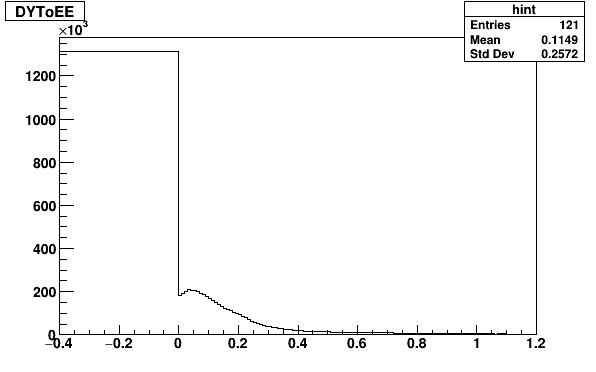

In [11]:
k = 'int'
c[k] = ROOT.TCanvas(k, k, 600, 400)
h[k] = h['DYToEE'].Clone()
h[k].Reset()
h[k].SetName('hint')
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(h[k], 0.683)
print(h[k].Integral())
print(h[k].GetBinContent(1))
h[k].Draw()
c[k].Draw()

In [18]:
print(h[k].GetNbinsX())
print(h[k].GetBinContent(121))
count = 0
for i in range(0, h[k].GetNbinsX()+1):
    count += h[k].GetBinContent(i)
print(count)

121
896.843017578
1893313.61926


In [ ]:
'''
=======================
scale: 1.0150000000000001
offset: 0.0
2*LL: 11161.038139 | chi2 / ndf: 22138.164677 / 121 = 182.960039
=======================
scale: 1.016
offset: 0.0
2*LL: 11061.228723 | chi2 / ndf: 21953.761315 / 121 = 181.436044
=======================
scale: 1.0170000000000001
offset: 0.0
2*LL: 10972.360529 | chi2 / ndf: 21802.468145 / 121 = 180.185687
=======================
scale: 1.018
offset: 0.0
2*LL: 10950.336535 | chi2 / ndf: 21773.226795 / 121 = 179.944023
=======================
scale: 1.0190000000000001
offset: 0.0
2*LL: 10858.351724 | chi2 / ndf: 21607.726360 / 121 = 178.576251
=======================
scale: 1.02
offset: 0.0
2*LL: 10779.019929 | chi2 / ndf: 21467.633040 / 121 = 177.418455
=======================
scale: 1.0210000000000001
offset: 0.0
2*LL: 10649.481342 | chi2 / ndf: 21241.985579 / 121 = 175.553600
=======================
scale: 1.022
offset: 0.0
2*LL: 10665.389517 | chi2 / ndf: 21271.989401 / 121 = 175.801565
=======================
scale: 1.0230000000000001
offset: 0.0
2*LL: 10679.459336 | chi2 / ndf: 21304.117473 / 121 = 176.067087
=======================
scale: 1.024
offset: 0.0
2*LL: 10629.264081 | chi2 / ndf: 21218.267943 / 121 = 175.357586
=======================
scale: 1.025
offset: 0.0
2*LL: 10637.599285 | chi2 / ndf: 21243.012667 / 121 = 175.562088
=======================
scale: 1.026
offset: 0.0
2*LL: 10715.265029 | chi2 / ndf: 21400.062449 / 121 = 176.860020
=======================
scale: 1.027
offset: 0.0
2*LL: 10733.195875 | chi2 / ndf: 21452.914240 / 121 = 177.296812
=======================
scale: 1.028
offset: 0.0
2*LL: 10715.167353 | chi2 / ndf: 21434.284680 / 121 = 177.142849
=======================
scale: 1.029
offset: 0.0
'''

In [ ]:
'''
=======================
scale: 1.0210000000000001
offset: 0.0
2*LL: 10649.481342 | chi2 / ndf: 21241.985579 / 121 = 175.553600
=======================
scale: 1.022
offset: 0.0
2*LL: 10665.389517 | chi2 / ndf: 21271.989401 / 121 = 175.801565
=======================
scale: 1.0230000000000001
offset: 0.0
2*LL: 10679.459336 | chi2 / ndf: 21304.117473 / 121 = 176.067087
=======================
scale: 1.024
offset: 0.0
2*LL: 10629.264081 | chi2 / ndf: 21218.267943 / 121 = 175.357586
=======================
scale: 1.0250000000000001
offset: 0.0
2*LL: 10637.599285 | chi2 / ndf: 21243.012667 / 121 = 175.562088
=======================
scale: 1.026
offset: 0.0
2*LL: 10715.265029 | chi2 / ndf: 21400.062449 / 121 = 176.860020
=======================
scale: 1.0270000000000001
offset: 0.0
2*LL: 10733.195875 | chi2 / ndf: 21452.914240 / 121 = 177.296812
=======================
scale: 1.028
offset: 0.0
2*LL: 10715.167353 | chi2 / ndf: 21434.284680 / 121 = 177.142849
=======================
scale: 1.0290000000000001
offset: 0.0
2*LL: 10688.481636 | chi2 / ndf: 21396.788579 / 121 = 176.832963
=======================
scale: 1.03
offset: 0.0
2*LL: 10677.257922 | chi2 / ndf: 21397.267684 / 121 = 176.836923
=======================
scale: 1.031
offset: 0.0
2*LL: 10723.055499 | chi2 / ndf: 21497.123903 / 121 = 177.662181
=======================
scale: 1.032
offset: 0.0
2*LL: 10781.513161 | chi2 / ndf: 21618.176129 / 121 = 178.662613
=======================
scale: 1.033
offset: 0.0
2*LL: 10860.552246 | chi2 / ndf: 21783.147235 / 121 = 180.026010
=======================
scale: 1.034
offset: 0.0
2*LL: 10943.859317 | chi2 / ndf: 21955.775073 / 121 = 181.452687
=======================
scale: 1.035
offset: 0.0
2*LL: 11011.165701 | chi2 / ndf: 22104.517294 / 121 = 182.681961
=======================
scale: 1.036
offset: 0.0
2*LL: 11057.821447 | chi2 / ndf: 22216.359776 / 121 = 183.606279
=======================
scale: 1.037
offset: 0.0
2*LL: 11160.012490 | chi2 / ndf: 22427.971387 / 121 = 185.355135
=======================
scale: 1.038
offset: 0.0
2*LL: 11207.755774 | chi2 / ndf: 22542.747812 / 121 = 186.303701
=======================
scale: 1.039
offset: 0.0
2*LL: 11315.462893 | chi2 / ndf: 22767.816509 / 121 = 188.163773
'''

In [ ]:
'''=======================
scale: 1.028
offset: -0.008
2*LL: 766.813101 | chi2 / ndf: 1520.509047 / 121 = 12.566190
=======================
scale: 1.028
offset: -0.007
2*LL: 578.840112 | chi2 / ndf: 1143.028975 / 121 = 9.446520
=======================
scale: 1.028
offset: -0.006
2*LL: 511.599171 | chi2 / ndf: 1015.684597 / 121 = 8.394088
=======================
scale: 1.028
offset: -0.005
2*LL: 579.569733 | chi2 / ndf: 1159.908296 / 121 = 9.586019
=======================
scale: 1.028
offset: -0.004
2*LL: 759.982709 | chi2 / ndf: 1530.875919 / 121 = 12.651867
=======================
scale: 1.0290000000000001
offset: -0.008
2*LL: 758.371524 | chi2 / ndf: 1504.781392 / 121 = 12.436210
=======================
scale: 1.0290000000000001
offset: -0.007
2*LL: 568.440382 | chi2 / ndf: 1124.545274 / 121 = 9.293763
=======================
scale: 1.0290000000000001
offset: -0.006
2*LL: 515.098883 | chi2 / ndf: 1023.142960 / 121 = 8.455727
=======================
scale: 1.0290000000000001
offset: -0.005
2*LL: 586.717790 | chi2 / ndf: 1174.639785 / 121 = 9.707767
=======================
scale: 1.0290000000000001
offset: -0.004
2*LL: 770.663996 | chi2 / ndf: 1551.932155 / 121 = 12.825886
=======================
scale: 1.03
offset: -0.008
2*LL: 747.375619 | chi2 / ndf: 1484.739011 / 121 = 12.270570
=======================
scale: 1.03
offset: -0.007
2*LL: 565.502750 | chi2 / ndf: 1119.408885 / 121 = 9.251313
=======================
scale: 1.03
offset: -0.006
2*LL: 517.877461 | chi2 / ndf: 1029.009255 / 121 = 8.504209
=======================
scale: 1.03
offset: -0.005
2*LL: 594.125624 | chi2 / ndf: 1189.589586 / 121 = 9.831319
=======================
scale: 1.03
offset: -0.004
2*LL: 782.287875 | chi2 / ndf: 1575.598940 / 121 = 13.021479
=======================
scale: 1.031
offset: -0.008
2*LL: 735.091853 | chi2 / ndf: 1461.198330 / 121 = 12.076019
=======================
scale: 1.031
offset: -0.007
2*LL: 571.271321 | chi2 / ndf: 1131.234729 / 121 = 9.349047
=======================
scale: 1.031
offset: -0.006
2*LL: 525.048156 | chi2 / ndf: 1043.570984 / 121 = 8.624554
=======================
scale: 1.031
offset: -0.005
2*LL: 597.546145 | chi2 / ndf: 1196.918351 / 121 = 9.891887
=======================
scale: 1.031
offset: -0.004
2*LL: 795.530190 | chi2 / ndf: 1602.139719 / 121 = 13.240824
=======================
scale: 1.032
offset: -0.008
2*LL: 732.793700 | chi2 / ndf: 1456.832696 / 121 = 12.039940
=======================
scale: 1.032
offset: -0.007
2*LL: 577.869378 | chi2 / ndf: 1144.430811 / 121 = 9.458106
=======================
scale: 1.032
offset: -0.006
2*LL: 523.314813 | chi2 / ndf: 1040.654052 / 121 = 8.600447
=======================
scale: 1.032
offset: -0.005
2*LL: 614.363577 | chi2 / ndf: 1230.484782 / 121 = 10.169296
=======================
scale: 1.032
offset: -0.004
2*LL: 801.615852 | chi2 / ndf: 1615.766815 / 121 = 13.353445'''

max: 469146.84375
41.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: eps file Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o10MeV_nocorr_ptrwgt.eps has been created


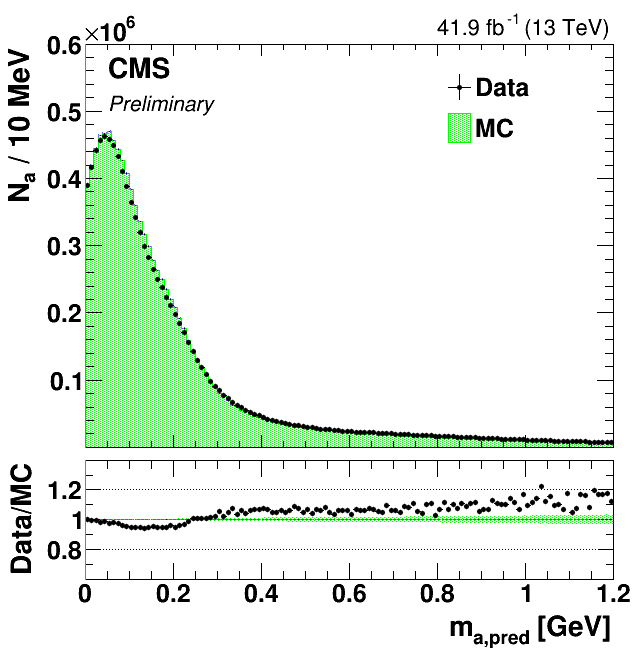

In [60]:
#def draw_hist_1dmastacked(ymax_=None, mcnorm=1.):
import CMS_lumi

hc = {}

do_trunc = True
#do_trunc = False

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(640*1), int(680*1)
#ROOT.TGaxis.fgMaxDigits = 3
#ROOT.gStyle.SetErrorX(0)
#ROOT.gStyle.SetOptStat(0)

k = kdata
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)

pUp = ROOT.TPad("upperPad", "upperPad",.005, .300, .995, .995) # (,,Double_t xlow, Double_t ylow, Double_t xup, Double_t yup,...)
pDn = ROOT.TPad("lowerPad", "lowerPad",.005, .005, .995, .300)
pUp.Draw()
pDn.Draw()
pUp.SetMargin(13.e-02,3.e-02,2.e-02,9.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)
pDn.SetMargin(13.e-02,3.e-02,36.e-02,2.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)

pUp.cd()

# dummy hist for drawing axes
hdummy = h[k].Clone()
hdummy.Reset()
hdummy.SetName('dummy')
hdummy = set_hist(hdummy, "m_{a,pred} [GeV]", "N_{a}", "")
hdummy.GetYaxis().SetTitle('N_{a} / %d MeV'%dM)
hdummy.GetXaxis().SetTitle('')
hdummy.GetXaxis().SetLabelSize(0.)
hdummy.GetYaxis().SetTitleOffset(0.9)
hdummy.GetYaxis().SetTitleSize(0.07)
hdummy.GetYaxis().SetLabelSize(0.06)
hdummy.GetYaxis().SetMaxDigits(3)
hdummy.SetLineColor(0)
hdummy.Draw("hist")

# Plot MC
k = kmc
h[k].Scale(h[kdata].Integral()/h[kmc].Integral())
print('max:',h[k].GetMaximum())
# Plot fill
hc[k] = h[k].Clone()
hc[k].SetLineColor(3)
hc[k].SetFillColor(3)
hc[k].SetFillStyle(fill_style)
hc[k].SetStats(0)
hc[k].Draw("hist same")
# Plot uncertainty
h[k].SetLineColor(9)
h[k].SetFillColor(9)
h[k].SetFillStyle(fill_style)
h[k].SetStats(0)
h[k].Draw("%s same"%err_style)

# Plot data
k = kdata
hc[k] = h[k].Clone()
hc[k].SetName(kdata+'errs')
hc[k].SetFillStyle(0)
hc[k].SetMarkerStyle(20)
#hc[k].SetMarkerSize(0.85)
hc[k].SetMarkerSize(0.7)
hc[k].SetStats(0)
hc[k].Draw("E same")

#if ymax_ is None and hc[k].GetBinContent(2) > 0.:
ymax_lowbin = 1 if do_trunc else 2
if dM == 100:
    ymax = 6.e6
elif dM == 10:
    ymax = 6.e5
else:
    ymax = 1.3*max(np.max([hc[kdata].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kdata].GetNbinsX()+2)]),
                   np.max([hc[kmc].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kmc].GetNbinsX()+2)]))
#ymax = 6.e5 #dM=10
hdummy.GetYaxis().SetRangeUser(0.1, ymax)
if do_trunc:
    hdummy.GetXaxis().SetRangeUser(0., 1.2)
else:
    hdummy.GetXaxis().SetRangeUser(-0.2, 1.2)
ROOT.gPad.RedrawAxis()

l, l2, hatch = {}, {}, {}
legend = {}

'''l[k] = ROOT.TLine(0.135, 0., 0.135, ymax) # x0,y0, x1,y1
l[k].SetLineColor(14)
l[k].SetLineStyle(7)
l[k].Draw("same")

l2[k] = ROOT.TLine(0.55, 0., 0.55, ymax) # x0,y0, x1,y1
l2[k].SetLineColor(14)
l2[k].SetLineStyle(7)
l2[k].Draw("same")'''

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[0.,ymax]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
#hatch[k].SetLineWidth(5)
hatch[k].SetFillStyle(3004)
#hatch[k].SetFillColor(14)
hatch[k].SetFillColor(12)
#ROOT.gStyle.SetHatchesLineWidth(2)
hatch[k].Draw("same")

legend[k] = ROOT.TLegend(0.7,0.68,0.9,0.86) #(x1, y1, x2, y2)
legend[k].AddEntry(kdata+'errs', "Data", "lep")
legend[k].AddEntry(h[kmc].GetName(), "MC", "f")
legend[k].SetBorderSize(0)
legend[k].Draw("same")

CMS_lumi.CMS_lumi(pUp, iPeriod, iPos)

##### Ratio plots on lower pad #####
pDn.cd()
pDn.SetTicky()
pDn.SetGridy()

if do_trunc:
    fUnity = ROOT.TF1("fUnity","[0]",0.,1.2)
else:
    fUnity = ROOT.TF1("fUnity","[0]",-0.2,1.2)
fUnity.SetParameter( 0,1. )

fUnity.GetXaxis().SetTitle("m_{a,pred} [GeV]")
fUnity.GetXaxis().SetTickLength(0.1)
fUnity.GetXaxis().SetTitleOffset(1.05)
fUnity.GetXaxis().SetTitleSize(0.16)
fUnity.GetXaxis().SetLabelSize(0.14)
#if not do_trunc:
#    fUnity.GetXaxis().ChangeLabel(1,-1, 0,-1,-1,-1,"")
#    fUnity.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"#font[22]{#gamma_{veto}}")

#dY = 0.199
dY = 0.399
#fUnity.GetYaxis().SetTitle("SB/SR")
fUnity.GetYaxis().SetTitle("Data/MC")
#fUnity.GetYaxis().SetRangeUser(1.-dY,1.+dY)
fUnity.SetMaximum(1.+dY)
fUnity.SetMinimum(1.-dY)
fUnity.GetYaxis().SetNdivisions(305)
fUnity.GetYaxis().SetTickLength(0.04)
fUnity.GetYaxis().SetLabelFont(62)
fUnity.GetYaxis().SetTitleFont(62)
fUnity.GetYaxis().SetTitleOffset(.4)
fUnity.GetYaxis().SetTitleSize(0.16)
fUnity.GetYaxis().SetLabelSize(0.14)

fUnity.SetLineColor(9)
fUnity.SetLineWidth(1)
fUnity.SetLineStyle(7)
fUnity.SetTitle("")
fUnity.Draw()

# Data error bands
#k = kdata
#kr = kdata+'err'
# MC error bands
k = kmc
kr = kmc+'errs'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetNbinsX()-1):
    ib = i+2
    h[kr].SetPoint(i, h[k].GetBinCenter(ib), 1.)
    h[kr].SetPointError(
        i,
        h[k].GetBinWidth(ib)/2.,
        h[k].GetBinWidth(ib)/2.,
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        )
#h[kr].SetFillColor(9)
h[kr].SetFillColor(3)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")

# Data errors
kr = 'dataomc'+'errs'
h[kr] = h[kdata].Clone()
h[kr].Reset()
h[kr].SetName(kr)
for ib in range(1, h[k].GetNbinsX()+1):
    obs = h[kdata].GetBinContent(ib)
    obs_err = h[kdata].GetBinError(ib)
    bkg = h[kmc].GetBinContent(ib)
    if bkg == 0.: continue
    bkg_err = h[kmc].GetBinError(ib)
    h[kr].SetBinContent(ib, obs/bkg)
    h[kr].SetBinError(ib, obs_err/obs)
#h[kr].SetLineColor(9)
h[kr].SetStats(0)
#h[kr].Divide(h[kmc])
h[kr].SetMarkerStyle(20)
#h[kr].SetMarkerSize(0.85)
h[kr].SetMarkerSize(0.7)
h[kr].SetMarkerColor(1)
h[kr].SetLineColor(1) #9
h[kr].Draw("ep same")

k = kr
'''l[k] = ROOT.TLine(0.135, 1.-dY, 0.135, 1.+dY) # x0,y0, x1,y1
l[k].SetLineColor(14)
l[k].SetLineStyle(7)
l[k].Draw("same")

l2[k] = ROOT.TLine(0.55, 1.-dY, 0.55, 1.+dY) # x0,y0, x1,y1
l2[k].SetLineColor(14)
l2[k].SetLineStyle(7)
l2[k].Draw("same")'''

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[1.-dY,1.+dY]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
hatch[k].SetFillStyle(3004)
hatch[k].SetFillColor(14)
hatch[k].Draw("same")

k = kdata
c[k].Draw()
c[k].Update()
#c[k].Print('Plots/%s_sb2srvsr_blind_%s.eps'%(samples, blind))
#c[k].Print('Plots/%s_sb2srvsr_blind_%.eps'%(samples, blind))
#samples_str = '_'.join(samples)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_noptrwgt.eps'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_ptrwgt.eps'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_corr_ptrwgt.eps'%dM)

#draw_hist_1dmastacked()